In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import scipy.special
from sympy.physics.wigner import gaunt
#2
%matplotlib notebook

In [6]:
# SPHERICAL HARMONICS
def plot_Ylm(ax,l,m,cpal='inferno',origin=np.array([0.,0.,0.])):
    y = scipy.special.sph_harm
    theta, phi = np.linspace(0, np.pi, 80), np.linspace(0, 2 * np.pi, 80)
    THETA, PHI = np.meshgrid(theta, phi)
    for el,em in zip(np.atleast_1d(l), np.atleast_1d(m)):
        R = np.sqrt(2)*np.real(y(em,el,PHI,THETA)) if em < 0 \
                else np.real(y(0,el,PHI,THETA)) if em == 0 \
                else np.sqrt(2)*np.imag(y(em,el,PHI,THETA))
        cm = plt.get_cmap(cpal)(R/(np.amax(R)))
        R = np.power(np.abs(R), 2)
        X = R * np.sin(THETA) * np.cos(PHI) - origin[0]
        Y = R * np.sin(THETA) * np.sin(PHI) - origin[1]
        Z = R * np.cos(THETA) - origin[2]
        #X = np.sin(THETA) * np.cos(PHI)
        #Y = np.sin(THETA) * np.sin(PHI)
        ax.plot_surface(
            X, Y, Z, rstride=1, cstride=1, #cmap=plt.get_cmap('cividis'),
            facecolors=cm,
            linewidth=0, antialiased=False, alpha=0.8)
        #ax.plot(xs=np.zeros(100), ys=np.linspace(0,0.5,100), zs=np.zeros(100), color='b')
        #ax.plot(xs=np.zeros(100), ys=np.zeros(100), zs=np.linspace(0,0.5,100), color='y')
        #ax.plot(xs=np.linspace(0,0.5,100),ys=np.zeros(100), zs=np.zeros(100), color='r')
        
        # make the panes transparent
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # make the grid lines transparent
        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        
        # Hide grid
        ax.grid(False)
        # Hide axes ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

In [7]:
fig = plt.figure()
L = [5]
ax = fig.add_subplot(111, projection='3d', frame_on=False)
origin = np.array([0.,0.,0.])
sep = 0.6
for l in L:
    origin += np.array([sep, 0., 0.])
    for m in np.linspace(-l,l,2*l+1):
        #ax.set_xlim(-0.3,0.3)
        #ax.set_ylim(-0.3,0.3)
        #ax.set_zlim(-0.3,0.3)
        origin[2] = m*sep
        plot_Ylm(ax, l,m,'cividis',origin=origin)

<IPython.core.display.Javascript object>

In [5]:
# WIKIPEDIA BASIS
def Ybasis(l,m,theta,phi):
    if m < 0:
        return np.sqrt(2)*np.imag(scipy.special.sph_harm(np.abs(m),l,phi,theta))
    elif m == 0:
        return np.real(scipy.special.sph_harm(0,l,phi,theta))
    else:
        return np.sqrt(2)*np.real(scipy.special.sph_harm(m,l,phi,theta))

# WIKIPEDIA BASIS
def Yij(gridpts,lmax):
    # initialize basis function fitting matrix
    #
    # inputs:
    #    - gridpts -- an array of all (θ,φ) pairs (k x 2)
    #                 order is important! should be given as θ first, then φ
    #    - lmax -- max spherical harmonic (should be even)
    #
    # outputs:
    #    - Yij -- the regression basis matrix
    # 
    # rows x cols  <-->  k x M
    # i = [0, k-1]  where k = # of gridpoints
    # j = [0, M] where M = # of basis functions, (lmax+1)^2
    #
    k = len(gridpts)
    #y = scipy.special.sph_harm
    Yij = np.zeros(shape=(k,(lmax+1)**2))
    for i in range(k):
        j = 0
        for l in range(lmax):
            for m in np.linspace(-l,l,2*l+1):
                Yij[i][int(l**2+l+m)] += np.sqrt(2)*np.imag(scipy.special.sph_harm(np.abs(m),l,gridpts[i][1], gridpts[i][0])) if m < 0 \
                    else np.real(scipy.special.sph_harm(0,l,gridpts[i][1], gridpts[i][0])) if m == 0 \
                    else np.sqrt(2)*np.real(scipy.special.sph_harm(m,l,gridpts[i][1], gridpts[i][0]))
                j += 1
    return Yij

In [6]:
### DESCOTEAUX BASIS ###
def Ybasis(l,m,theta,phi):
    if m < 0:
        return np.sqrt(2)*np.real(scipy.special.sph_harm(m,l,phi,theta))
    elif m == 0:
        return np.real(scipy.special.sph_harm(0,l,phi,theta))
    else:
        return np.sqrt(2)*np.imag(scipy.special.sph_harm(m,l,phi,theta))
    
def Yij(gridpts,lmax):
    # DESCOTEAUX BASIS
    # initialize basis function fitting matrix
    #
    # inputs:
    #    - gridpts -- an array of all (θ,φ) pairs (k x 2)
    #                 order is important! should be given as θ first, then φ
    #    - lmax -- max spherical harmonic (should be even)
    #
    # outputs:
    #    - Yij -- the regression basis matrix
    # 
    # rows x cols  <-->  k x M
    # i = [0, k-1]  where k = # of gridpoints
    # j = [0, M] where M = # of basis functions, (lmax+1)^2
    #
    k = len(gridpts)
    #y = scipy.special.sph_harm
    Yij = np.zeros(shape=(k,(lmax+1)**2))
    for i in range(k):
        j = 0
        for l in range(lmax):
            for m in np.linspace(-l,l,2*l+1):
                Yij[i][int(l**2+l+m)] += np.sqrt(2)*np.real(scipy.special.sph_harm(m,l,gridpts[i][1], gridpts[i][0])) if m < 0 \
                    else np.real(scipy.special.sph_harm(0,l,gridpts[i][1], gridpts[i][0])) if m == 0 \
                    else np.sqrt(2)*np.imag(scipy.special.sph_harm(m,l,gridpts[i][1], gridpts[i][0]))
                j += 1
    return Yij

In [7]:
def plot_grid(na, r0=np.array([0,0,0])):
    grid = []
    sph_grid = []                                # na = number of slices
    da=np.pi/(na-1); # latitude angle step
    a = -np.pi/2
    count = 0
    for ia in range(na): # slice sphere to circles in xy planes
        r=np.cos(a);                           # radius of actual circle in xy plane
        z=np.sin(a);                           # height of actual circle in xy plane
        nb=np.ceil(2.0*np.pi*r/da)
        db=2.0*np.pi/nb;             # longitude angle step
        if ia==0 or ia==na-1:
            nb=1
            db=0.0 # handle edge cases
        b = 0.0
        for ib in range(int(nb)):  # cut circle to vertexes
            x=r*np.cos(b);                     # compute x,y of vertex
            y=r*np.sin(b);
            grid.append((x,y,z))
            sph_grid.append((a+np.pi/2,b))
            b += db
            
            count += 1
            if count == 20:
                print(r, z)
        a += da
    return grid, sph_grid

def get_grid(na):
    # Returns a cartesian and spherical grid
    # spherical grid order = (θ, φ)
    grid = []
    sph_grid = []                                # na = number of slices
    da=np.pi/(na-1); # latitude angle step
    a = np.pi/2
    count = 0
    actual_a = 0
    for ia in range(na): # slice sphere to circles in xy planes
        r=np.cos(a);                           # radius of actual circle in xy plane
        z=np.sin(a);                           # height of actual circle in xy plane
        nb=np.ceil(2.0*np.pi*r/da)
        db=2.0*np.pi/nb;             # longitude angle step
        if ia==0 or ia==na-1:
            nb=1
            db=0.0 # handle edge cases
        b = 0.0
        for ib in range(int(nb)):  # cut circle to vertexes
            x=r*np.cos(b);                     # compute x,y of vertex
            y=r*np.sin(b);
            grid.append(np.array([x,y,z]))
            sph_grid.append(np.array([actual_a,b]))
            b += db
            
            count += 1
        a -= da
        actual_a += da
    return np.array(grid), np.array(sph_grid)

In [8]:
xcart,x = get_grid(25)

/Users/lancebettinson/miniconda2/envs/testing3.7/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


In [9]:
myY = Yij(x,lmax=4)

/Users/lancebettinson/miniconda2/envs/testing3.7/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


[ 9.09717743e-01 -1.57426155e-16 -8.99887803e-17 -1.09800692e-16
  1.23599048e-17 -4.49943902e-18 -5.38477470e-03  8.45271119e-17
 -3.28686406e-17  1.17310675e-16 -3.05745013e-17 -8.02309608e-17
 -5.14779191e-16  1.95983963e-17  5.55653613e-18  6.83130969e-17
  1.68051337e-17  1.84314369e-17 -5.50774704e-17  2.04263689e-16
 -3.92685765e-01  1.99222149e-16  8.93470428e-17  8.37004077e-17
 -1.93552219e-17 -2.99510850e-17  9.97465999e-18  8.82540568e-17
 -7.80625564e-18  9.38919081e-17 -6.12357387e-16  6.14861562e-17
  1.26743234e-16  7.12233956e-18  1.16009632e-17  8.74278288e-18
  1.58377543e-15  5.85469173e-17  6.41847686e-17 -6.59194921e-17
 -2.19008839e-17 -6.50521303e-19  1.15319940e-01  1.69000014e-17
  6.34818762e-17 -1.34441069e-17 -3.68989914e-18 -4.38017678e-17
 -6.53686260e-17 -2.08286469e-08 -1.60461922e-17  4.80301562e-17
  1.06468653e-16  7.71951947e-17  1.99493200e-17  5.07406617e-17
 -5.03937170e-16 -5.14922614e-18 -2.38524478e-18 -6.75316313e-17
 -3.12250226e-17 -9.51811

<IPython.core.display.Javascript object>


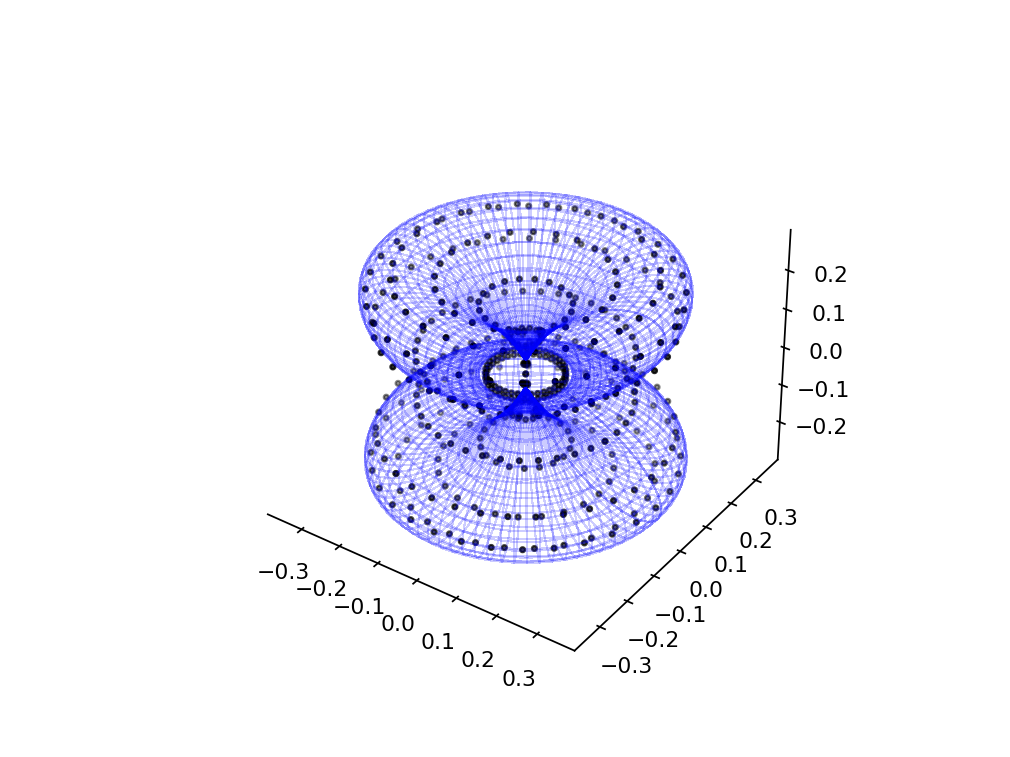

<IPython.core.display.Javascript object>


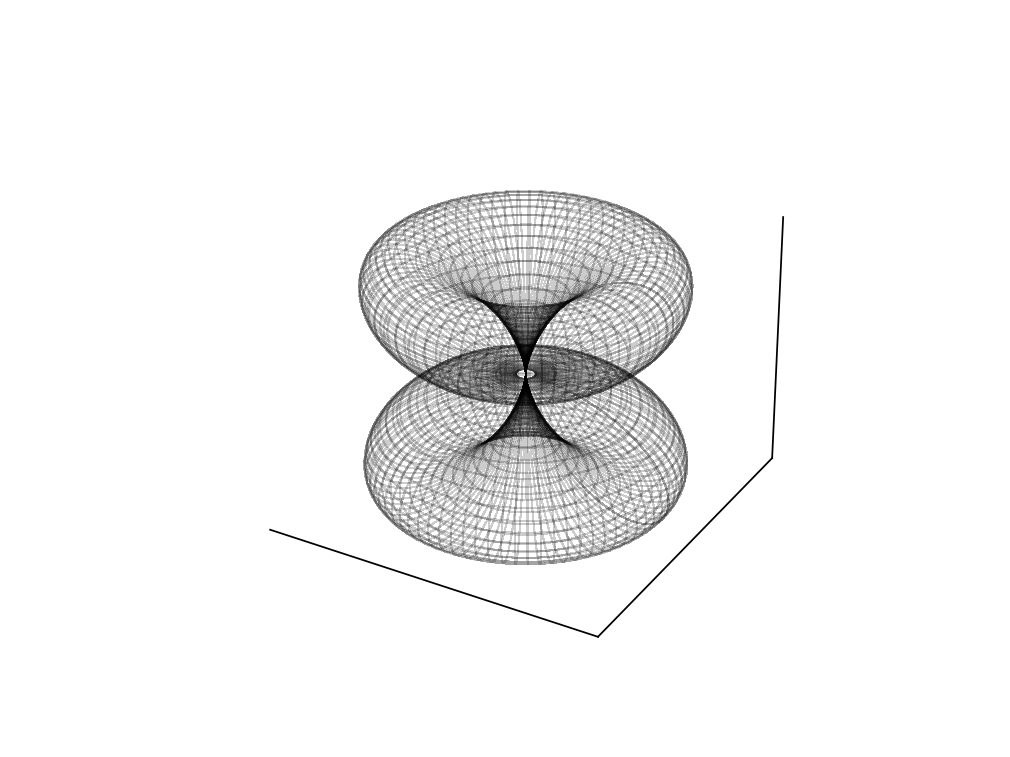

[]

In [10]:
########################
# COEFFICIENT TESTING  #
########################
#U,S,V = np.linalg.svd(myY, full_matrices=False)
#I = np.linalg.pinv(U @ np.diag(S) @ V) @ myY
#v = np.ones(len(x))
#ahat = np.matmul( np.linalg.pinv(np.matmul(U, np.matmul( np.diag(S), V))), v)
#print(ahat)
#print(np.real(ahat[0]*scipy.special.sph_harm(0,0,7,5)))

M,L = -2,3

theta, phi = np.linspace(0, np.pi, 80), np.linspace(0, 2 * np.pi, 80)
THETA, PHI = np.meshgrid(theta, phi)

# DEFINE "ACTUAL" ENERGY
Vsurf = lambda ph,th: np.abs(scipy.special.sph_harm(M,L,ph,th))

# GENERATE THE DATA
xcart,xsph = get_grid(20)
#Vsurf = np.vectorize(Vsurf)
vdata = []
for i,xyz in enumerate(xcart):
    #vdata.append(Vsurf(*xyz))
    #vdata.append(np.real(scipy.special.sph_harm(0,0,xsph[1],xsph[0])))
    continue
xsph = np.transpose(xsph)
vdata = np.abs(scipy.special.sph_harm(M,L,xsph[1], xsph[0]))
vdata = Vsurf(xsph[1], xsph[0])

# data
vtrial = np.ones(len(xsph)) * 100

# GET BASES FOR MAX l = λ 
Yb = Yij(np.transpose(xsph), lmax=8)
#Yb = Y(np.transpose(xsph), lmax=8)
#print(len(Yb))

# SOLVE THE COEFFICIENTS
U,S,V = np.linalg.svd(Yb, full_matrices=False)
ahat = np.matmul( np.linalg.pinv(np.matmul(U, np.matmul( np.diag(S), V))), np.array(vdata))
print(ahat)

# PLOT THE APPROXIMATE FUNCTION
R = np.zeros(shape=THETA.shape)
lam = int(np.sqrt(len(ahat)))
ind = 0
for l in range(lam):
    for m in np.linspace(-l, l, 2*l+1):
        piece = Ybasis(l, int(m), THETA, PHI)
        #piece = ybas(l,int(m),THETA,PHI)
        #piece = np.real(scipy.special.sph_harm(m,l,PHI,THETA))
        R += ahat[ind] * piece
        ind += 1
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', frame_on=False)
ax.plot_wireframe(
    X, Y, Z, rstride=1, cstride=1, #cmap=plt.get_cmap('cividis'),
#    #facecolors=cm,
    color='b',
    linewidth=0.5, antialiased=False, alpha=.20)
rapprox = np.matmul(Yb, ahat)
#ax.scatter(xs=rapprox*np.sin(xsph[0])*np.cos(xsph[1]),
#          ys = rapprox*np.sin(xsph[0])*np.sin(xsph[1]),
#          zs = rapprox*np.cos(xsph[0]),
#          marker='.',
#          color='b')
r = vdata
ax.scatter(xs=r*np.sin(xsph[0])*np.cos(xsph[1]),
          ys = r*np.sin(xsph[0])*np.sin(xsph[1]),
          zs = r*np.cos(xsph[0]),
          marker='.',
          color='k')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)


# PLOT THE "ACTUAL" FUNCTION
#R = Vsurf
#R = Vsurf(np.sin(THETA)*np.cos(PHI), np.sin(THETA)*np.sin(PHI), np.cos(THETA))
R = Vsurf(PHI,THETA)
X = R*np.sin(THETA) * np.cos(PHI)
Y = R*np.sin(THETA) * np.sin(PHI)
Z = R*np.cos(THETA)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', frame_on=False)
ax.plot_wireframe(
    X, Y, Z, rstride=1, cstride=1, #cmap=plt.get_cmap('cividis'),
    #facecolors=cm,
    color='k',
    linewidth=0.5, antialiased=False, alpha=.20)
r = vdata
#ax.scatter(xs=r*np.sin(xsph[0])*np.cos(xsph[1]),
#          ys = r*np.sin(xsph[0])*np.sin(xsph[1]),
#          zs = r*np.cos(xsph[0]),
#          marker='.',
#          color='r')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Hide grid
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

In [11]:
#scipy.special.sph_harm(0,0,xsph[1])
print(np.transpose(xsph)[0])

[0. 0.]


In [12]:
print(len(ahat))

81


In [13]:
def real_gaunt(l1,l2,l3,m1,m2,m3):
    # SOMETHING IS FISHY HERE, DO NOT USE.
    if m1 == 0 and m2 == m3:
        return np.power(-1., m2)* gaunt(l1,l2,l3,0,m2,-m2)
    elif m1 > 0 and m2 == m1+m3:
        return np.power(-1., m3)*0.5*np.sqrt(2)*gaunt(l1,l2,l3,m1,-m2,m3)
    elif m1 > 0 and m3 == m1+m2:
        return np.power(-1., m2)*0.5*np.sqrt(2)*gaunt(l1,l2,l3,m1,m2,-m3)
    elif m1 > 0 and (m1+m2+m3)==0:
        return -np.power(-1.,m1)*0.5*np.sqrt(2)*gaunt(l1,l2,l3,m1,m2,m3)
    else:
        return 0

In [14]:
lam = int(np.sqrt(len(ahat)))
Lam = 5
M = Lam**2
H = np.zeros(shape=(M,M))
ahat = np.zeros(shape=(lam**2))
hbar = 1 # FOR NOW
I = 1 # FOR NOW
for l in range(Lam):
    for m in np.linspace(-l,l,2*l+1):
        j = int(np.power(l, 2) + l + m)
        for ll in range(Lam):
            for mm in np.linspace(-ll,ll,2*ll+1):
                i = int(np.power(ll, 2) + ll + mm)
                for L in range(lam):
                    for M in np.linspace(-L, L, 2*L+1):
                        k = int(np.power(L,2) + L + M)
                        multiplier = 1
                        if mm != 0:
                            multiplier *= np.sqrt(2)
                        if m != 0:
                            multiplier *= np.sqrt(2)
                        if M != 0:
                            multiplier *= np.sqrt(2)
                        # â should carry the unit of energy
                        H[i][j] += ahat[k] * multiplier* gaunt(ll,L,l,int(mm),int(M),int(m))
                        #H[i][j] += ahat[k] * real_gaunt(ll, L, l, int(mm), -int(M), int(m))
                if ll == l and mm == m:
                    # should have units of energy consistent with â 
                    H[i][j] += hbar * l*(l+1)/2. * np.power(I, -1.)
#print(H)           

In [15]:
print(np.linalg.eigh(H)[0])
#print(H)
print((H.T == H).all())

[ 0.  1.  1.  1.  3.  3.  3.  3.  3.  6.  6.  6.  6.  6.  6.  6. 10. 10.
 10. 10. 10. 10. 10. 10. 10.]
True


In [97]:
print(constants.hbar)

1.3806504e-23


In [16]:
np.sum(np.exp(-(np.linalg.eigh(H)[0]))[:-1])

2.3702881300284115

In [17]:
# GET ENERGIES FOR MOLECULES ON A SURFACE

###### DEFINE WHAT SHOULD BE GIVEN TO THE PROGRAM FIRST #######
# first get the file/directory of the associated frequency
# OPTION 1
freqfile = 'qmmm_prop.freq.out'
directory = '/Users/lancebettinson/Documents/entropy/um-rr/propqmmm'
#
# then get the number of atoms in the adsorbate, temperature, etc.
#
# OPTION 1
nads = 11
#
#
T = 298 #K

###############################################################

# import needed modules
import os
from ape.sampling import SamplingJob
from ape.qchem import QChemLog
from ape.common import get_electronic_energy
from ape.InternalCoordinates import getXYZ
from tnuts.qchem import get_level_of_theory
from rigidObject import RigidObject
from tnuts.job.job import Job

class Adsorbate:
    def __init__(self, freqfile, directory, nads, T=300, ncpus=4):
        self.freqfile = freqfile
        self.directory = directory
        self.nads = nads
        self.T = T
        
        self.label = freqfile.split('.')[0]
        self.Log = QChemLog(os.path.join(directory, freqfile))
        level_of_theory_kwargs = get_level_of_theory(Log)
        
        self.samp = SamplingJob(
            input_file=os.path.join(directory, freqfile),
            label=label,
            ncpus=ncpus, output_directory=directory,
            thresh=0.5,
            **level_of_theory_kwargs)
        self.samp.parse()
        
        self.path = os.path.join(self.samp.output_directory, 'output_file')
        if not os.path.exists(self.path):
            os.makedirs(self.path)
        self.file_name = 'samp_{}'
        
        # get qchem kwargs
        # these are all that are needed with APE, with the exception of 'path' and 'file_name'
        self.qchem_kwargs = {}
        self.qchem_kwargs['ncpus'] = self.samp.ncpus
        self.qchem_kwargs['charge'] = self.samp.charge
        self.qchem_kwargs['level_of_theory'] = self.samp.level_of_theory
        self.qchem_kwargs['basis'] = self.samp.basis
        self.qchem_kwargs['unrestricted'] = self.samp.unrestricted
        self.qchem_kwargs['multiplicity'] = self.samp.spin_multiplicity
        self.ads_kwargs = {}
        self.ads_kwargs['ncpus'] = self.samp.ncpus
        self.ads_kwargs['charge'] = self.samp.charge
        self.ads_kwargs['level_of_theory'] = self.samp.level_of_theory
        self.ads_kwargs['basis'] = self.samp.basis
        self.ads_kwargs['unrestricted'] = self.samp.unrestricted
        self.ads_kwargs['multiplicity'] = self.samp.spin_multiplicity 
        
        # QM kwargs
        self.qchem_kwargs['is_QM_MM_INTERFACE'] = self.samp.is_QM_MM_INTERFACE
        self.qchem_kwargs['QM_USER_CONNECT'] = self.samp.QM_USER_CONNECT
        self.qchem_kwargs['QM_ATOMS'] = self.samp.QM_ATOMS
        self.qchem_kwargs['force_field_params'] = self.samp.force_field_params
        self.qchem_kwargs['fixed_molecule_string'] = self.samp.fixed_molecule_string
        self.qchem_kwargs['opt'] = self.samp.opt
        self.qchem_kwargs['number_of_fixed_atoms'] = self.samp.number_of_fixed_atoms
        
        # get mass of adsorbate
        mass = self.samp.conformer.mass.value_si[:self.nads]
        coordinates = self.samp.conformer.coordinates.value[:self.nads]
        #if linear is None:
        #    linear = is_linear(coordinates)
        #    if linear:
        #        logging.info('Determined species {0} to be linear.'.format(label))
        
        # get moments of inertia of adsorbate
        #if not os.path.exists(os.path.join(directory, 'ads{}.q.out'.format(self.nads))):
        #    self.ads_xyz = getXYZ(self.samp.symbols[:self.nads],
        #            self.samp.internal.cart_coords[:(3*self.nads)])
        #    self.adsJob = Job(xyz=self.ads_xyz, path=directory,
        #            file_name='ads{}'.format(self.nads), jobtype='freq', **self.ads_kwargs)
        #    self.adsJob.write_input_file()
        #    self.adsJob.submit()
        #self.adsLog = QChemLog(os.path.join(directory,
        #    'ads{}.q.out'.format(self.nads)))
        #self.ads_conformer, unscaled_frequencies = self.adsLog.load_conformer()
        #self.inertia = self.ads_conformer.get_moment_of_inertia_tensor()
        #self.inertia_xyz = np.linalg.eigh(self.inertia)[1]
        
        # get center of mass of adsorbate
        # THIS WILL STAY CONSTANT
        xm = 0.0
        ym = 0.0
        zm = 0.0
        totmass = 0.0
        for i in range(self.nads):
            xm += mass[i] * coordinates[i, 0]
            ym += mass[i] * coordinates[i, 1]
            zm += mass[i] * coordinates[i, 2]
            totmass += mass[i]
        xm /= totmass
        ym /= totmass
        zm /= totmass
        
        self.com = np.array([xm,ym,zm])    # AGAIN, THIS WILL STAY CONSTANT
        self.rigidrotor = RigidObject(nads, self.samp.internal.c3d)
        self.rigidrotor.change_origin(self.com) # Set rotational origin to c.o.m.
        
        self.record_script ='''{natom}\n# Point {sample} Energy = {e_elect}\n{xyz}\n'''
    
    def reorient_by(self, dtheta, dphi):
        # theta is polar angle, phi is azimuthal angle
        self.rigidrotor.rotate_x(dphi)
        self.rigidrotor.rotate_z(dtheta)
        self.samp.internal.cart_coords[:(3*self.nads)] = self.rigidrotor.to_array().flatten()
    
    def sample(self, na=20, dry=False, write=False):
        # Returns a cartesian and spherical grid
        # na is the sampling resolution
        # spherical grid order = (θ, φ)
        # na = number of circular slices
        
        # filename for vmd viewing
        name = 'configs.txt'
        
        # begin sampling spherical grid
        grid = []
        sph_grid = []                                
        v = []
        count = 0
        
        da=np.pi/(na-1); # latitude angle step
        a = np.pi/2
        actual_a = 0
        for ia in range(na): # slice sphere to circles in xy planes
            r=np.cos(a);                           # radius of actual circle in xy plane
            z=np.sin(a);                           # height of actual circle in xy plane
            nb=np.ceil(2.0*np.pi*r/da)
            db=2.0*np.pi/nb;             # longitude angle step
            if ia==0 or ia==na-1:
                nb=1
                db=0.0 # handle edge cases
            b = 0.0
            for ib in range(int(nb)):  # cut circle to vertexes
                x=r*np.cos(b);                     # compute x,y of vertex
                y=r*np.sin(b);
                grid.append(np.array([x,y,z]))
                sph_grid.append(np.array([actual_a,b]))
                self.reorient_by(da,db)
                xyz = getXYZ(self.samp.symbols, self.samp.internal.cart_coords)
                
                # run Q-Chem job
                if not dry:
                    E = get_electronic_energy(xyz=xyz, path=self.path, file_name=self.file_name.format(count),
                                             **self.qchem_kwargs)
                    v.append(E)
                else:
                    E = 0
                    
                if write:
                    # write a file showing geometric configurations to sample
                    name = 'configs.txt'
                    with open(os.path.join(self.directory, name), 'a') as f:
                        content = self.record_script.format(natom=self.samp.natom,
                                                           sample=count, e_elect=E, xyz=xyz)
                        f.write(content)
                        
                count += 1
                b += db
            a -= da
            actual_a += da
        if not dry:
            v = np.array(v)-np.min(v)
            #np.save
        return np.array(grid), np.array(sph_grid), np.array(v)
        

# define label, get log of needed specs
label = freqfile.split('.')[0]
Log = QChemLog(os.path.join(directory, freqfile))
level_of_theory_kwargs = get_level_of_theory(Log)

ads = Adsorbate(freqfile, directory, 11)

xx,xxsph,vv = ads.sample(na=25)

/Users/lancebettinson/miniconda2/envs/testing3.7/lib/python3.7/site-packages/ipykernel_launcher.py:150: RuntimeWarning: divide by zero encountered in double_scalars


In [18]:
xx,xxsph,vv = ads.sample(na=25)

/Users/lancebettinson/miniconda2/envs/testing3.7/lib/python3.7/site-packages/ipykernel_launcher.py:150: RuntimeWarning: divide by zero encountered in double_scalars


In [19]:
print(getXYZ(ads.samp.symbols[:ads.nads], ads.samp.internal.cart_coords[:3*ads.nads]))

C       21.0731605700     2.5290743923     6.4884598312
H       19.0345245939     2.1192386960     5.9555212007
C       19.5832459093     2.8332627386     6.5737400589
H       19.3892236772     3.8225709954     6.1514832850
H       19.2878656032     1.8155010326     8.4650105234
C       19.0599668157     2.7795208493     8.0034881644
H       17.9782233851     2.9255309931     8.0577721944
H       19.5275342877     3.5496692364     8.6179552466
H       21.2878633069     1.5229166410     6.8540097603
H       21.6476741604     3.2315097813     7.0924216214
H       21.4354352663     2.5976373913     5.4631592512


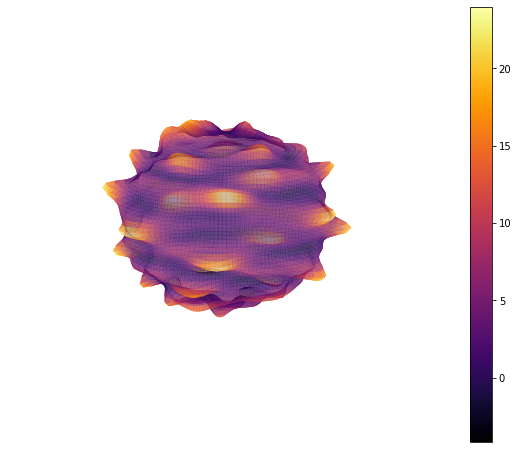

In [28]:
from matplotlib import cm, colors
lmax=30

# GET BASES FOR MAX l = λ 
YY = Yij(xxsph, lmax=lmax)
#Yb = Y(np.transpose(xsph), lmax=8)
#print(len(Yb))

# SOLVE THE COEFFICIENTS
U,S,V = np.linalg.svd(YY, full_matrices=False)
ahat = np.matmul( np.linalg.pinv(np.matmul(U, np.matmul( np.diag(S), V))), np.array(vv))
#print(ahat)

# PLOT THE APPROXIMATE FUNCTION
theta, phi = np.linspace(0, np.pi, 75), np.linspace(0, 2*np.pi, 150)
THETA, PHI = np.meshgrid(theta, phi)
R = np.zeros(shape=THETA.shape)
lam = int(np.sqrt(len(ahat)))
ind = 0
for l in range(lam):
    for m in np.linspace(-l, l, 2*l+1):
        piece = Ybasis(l, int(m), THETA, PHI)
        #piece = ybas(l,int(m),THETA,PHI)
        #piece = np.real(scipy.special.sph_harm(m,l,PHI,THETA))
        R += ahat[ind] * piece * 627.5
        ind += 1
R0 = 80.0
X = (R+R0) * np.sin(THETA) * np.cos(PHI)
Y = (R+R0) * np.sin(THETA) * np.sin(PHI)
Z = (R+R0) * np.cos(THETA)
norm = colors.Normalize()
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d', frame_on=False)
ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, #cmap=plt.get_cmap('cividis'),
    facecolors=cm.inferno(norm(R)),
    linewidth=.2, antialiased=True, alpha=.5, shade=False)
#ax.plot_wireframe(
#    X, Y, Z, rstride=1, cstride=1,
#    color='b',
#    linewidth=0.2, antialiased=False, alpha=.5)
#ax.quiver(0, 0, R0, *xx[0], length=0.7, normalize=False,
#                 arrow_length_ratio = 0.5, color='k')
#ax.quiver(0, 0, R0, *xx[0], length=R0/2, normalize=False,
#                 arrow_length_ratio = 0.3, color='k')

fig.colorbar(cm.ScalarMappable(norm=norm, cmap='inferno'), orientation='vertical')

r = vv
xxsphma = np.ma.masked_less(np.transpose(xxsph), 0.025)
#ax.scatter(xs=r*np.sin(xxsphma[0])*np.cos(xxsphma[1]),
#          ys = r*np.sin(xxsphma[0])*np.sin(xxsphma[1]),
#          zs = r*np.cos(xxsphma[0]),
#          marker='.',
#          color='k',
#          alpha=0.2)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Hide grid
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.view_init(elev=10, azim=120.)

fig.savefig(os.path.join(directory,'V_l{}.png'.format(lmax)), transparent=True)

<IPython.core.display.Javascript object>


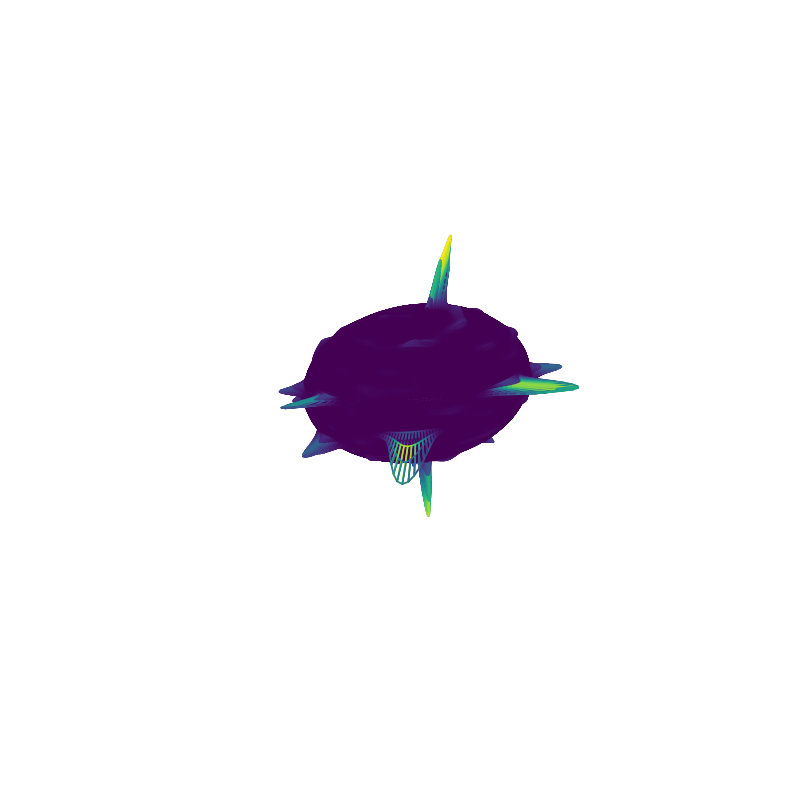

In [89]:
# PLOT POTENTIAL
from matplotlib import cm, colors
from ads.sph_harm import Yij as Y, Ybasis
import numpy.ma as ma
import rmgpy.constants as constants
import os

system = 'METH'
T = 300
beta = 1/constants.kB/T * constants.E_h

if system == 'METH':
    label = 'METH-CHA'
elif system == 'ETH1':
    label = 'ETH1-CHA'
elif system == 'ETH2':
    label = 'ETH2-CHA'
elif system == 'PROP1':
    label = 'PROP1-MFI'
elif system == 'PROP2':
    label = 'PROP2-MFI'
elif system == 'PROP3':
    label = 'PROP3-MFI'
    
%matplotlib notebook
wd = os.path.expandvars('$SPH/notebooks/{}'.format(label))
lmax=np.load(os.path.join(wd, 'lam.npy'))
xsph = np.load(os.path.join(wd, 'xsph.npy'))
v = np.load(os.path.join(wd, 'v.npy'))

# GET BASES FOR MAX l = λ 
y = Y(xsph, lmax=lmax)
#Yb = Y(np.transpose(xsph), lmax=8)
#print(len(Yb))

# SOLVE THE COEFFICIENTS
U,S,V = np.linalg.svd(y, full_matrices=False)
ahat = np.matmul( np.linalg.pinv(np.matmul(U, np.matmul( np.diag(S), V))), np.array(v))
#print(ahat)

# PLOT THE APPROXIMATE FUNCTION
theta, phi = np.linspace(0, np.pi, 120), np.linspace(0, 2*np.pi, 240)
THETA, PHI = np.meshgrid(theta, phi)
R = np.zeros(shape=THETA.shape)
lam = int(np.sqrt(len(ahat)))
ind = 0
for l in range(lam):
    for m in np.linspace(-l, l, 2*l+1):
        piece = Ybasis(l, int(m), THETA, PHI)
        #piece = ybas(l,int(m),THETA,PHI)
        #piece = np.real(scipy.special.sph_harm(m,l,PHI,THETA))
        R += ahat[ind] * piece
        ind += 1
# Negative of potential
R = np.exp(-beta*R)
R0 = np.max(R)
X = (R+R0) * np.sin(THETA) * np.cos(PHI)
Y = (R+R0) * np.sin(THETA) * np.sin(PHI)
Z = (R+R0) * np.cos(THETA)
norm = colors.Normalize()
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d', frame_on=False)
#ax.plot_surface(
#    X, Y, Z, rstride=1, cstride=1, #cmap=plt.get_cmap('cividis'),
#    facecolors=cm.cividis(norm(R)),
#    linewidth=.2, antialiased=True, alpha=1., shade=False)
clrs = cm.viridis(norm(R))
rcount, ccount, _ = clrs.shape
surf = ax.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount,
                       facecolors=clrs, shade=False)
surf.set_facecolor((0,0,0,0))
#ax.plot_surface(
#    X, Y, Z, rstride=1, cstride=1, #cmap=plt.get_cmap('cividis'),
#    facecolors=norm(R),
#    linewidth=.2, antialiased=True, alpha=1., shade=False)
#ax.plot_wireframe(
#    X, Y, Z, rstride=0, cstride=1,
#    color='k',
#    linewidth=1, antialiased=False, alpha=.3)

#fig.colorbar(cm.ScalarMappable(norm=norm, cmap='cividis'), orientation='vertical')

#r = v*627.5+R0
#xsphma = np.ma.masked_less(np.transpose(xsph), 0.025)
#ax.scatter(xs=r*np.sin(xsphma[0])*np.cos(xsphma[1]),
#          ys = r*np.sin(xsphma[0])*np.sin(xsphma[1]),
#          zs = r*np.cos(xsphma[0]),
#          marker='.',
#          color='k',
#          alpha=0.2)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Hide grid
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.view_init(elev=-90, azim=180.)

#fig.savefig(os.path.join(wd,'V_l{}.png'.format(lmax)), transparent=True)

In [95]:
ma.masked_less(norm(R))

1.0

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

x, y = np.linspace(-np.pi, np.pi, 120), np.linspace(-np.pi/2, np.pi/2, 120)
X, Y = np.meshgrid(x, y)

# Spherical coordinate arrays derived from x, y
# Necessary conversions to get Mollweide right
phi = x.copy()    # physical copy
phi[x < 0] = 2 * np.pi + x[x<0]
theta = np.pi/2 - y
PHI, THETA = np.meshgrid(phi, theta)

R = np.zeros(shape=THETA.shape)
lam = int(np.sqrt(len(ahat)))
ind = 0
for l in range(lam):
    for m in np.linspace(-l, l, 2*l+1):
        piece = Ybasis(l, int(m), THETA, PHI)
        #piece = ybas(l,int(m),THETA,PHI)
        #piece = np.real(scipy.special.sph_harm(m,l,PHI,THETA))
        R += ahat[ind] * piece * 627.5
        ind += 1

fig, ax = plt.subplots(subplot_kw=dict(projection='mollweide'), figsize=(10,8))
im = ax.pcolormesh(X, Y, R, cmap='inferno')
#ax.contour(THETA*RAD, PHI*RAD, Z, 10, colors='k')
#ax.contourf(THETA*RAD, PHI*RAD, Z, 100, cmap=plt.cm.jet)
fig.colorbar(im, orientation='horizontal')
plt.show()

<IPython.core.display.Javascript object>

/Users/lancebettinson/miniconda2/envs/testing3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


1.343996542557745e-15


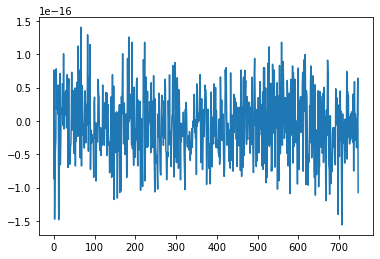

In [24]:
# RMS ERROR PREDICTIONS
actual = vv
predicted = np.zeros(len(vv))

# GET BASES FOR MAX l = λ 
YY = Yij(xxsph, lmax=30)
#Yb = Y(np.transpose(xsph), lmax=8)
#print(len(Yb))

# SOLVE THE COEFFICIENTS
U,S,V = np.linalg.svd(YY, full_matrices=False)
ahat = np.matmul( np.linalg.pinv(np.matmul(U, np.matmul( np.diag(S), V))), np.array(vv))
lam = int(np.sqrt(len(ahat)))
for i,xpair in enumerate(xxsph):
    ind = 0
    for l in range(lam):
        for m in np.linspace(-l, l, 2*l+1):
            piece = Ybasis(l, int(m), *xpair)
            #piece = ybas(l,int(m),THETA,PHI)
            #piece = np.real(scipy.special.sph_harm(m,l,PHI,THETA))
            predicted[i] += ahat[ind] * piece
            ind += 1
    
n = []
abs_err = []
laxis = []
err_axis = []
ind = 0
for p,a in zip(predicted,actual):
    abs_err.append(a-p)
    n.append(ind)
    ind += 1
laxis.append(lam)
err_axis.append(np.sqrt(np.sum(np.power(actual-predicted,2))))
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(laxis,err_axis,marker='v')
ax.plot(n, abs_err)
print(np.sqrt(np.sum(np.power(actual-predicted,2))))

1.6769437571623195e-15


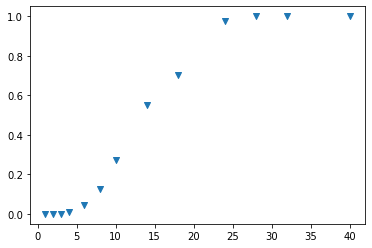

In [25]:
actual = vv
n = []
abs_err = []
laxis = []
err_axis = []
from sklearn.metrics import r2_score

for lam in [1,2,3,4,6,8,10,14,18,24,28,32,40]:
    # GET BASES FOR MAX l = λ 
    YY = Yij(xxsph, lmax=lam)
    #Yb = Y(np.transpose(xsph), lmax=8)
    #print(len(Yb))

    # SOLVE THE COEFFICIENTS
    U,S,V = np.linalg.svd(YY, full_matrices=False)
    ahat = np.matmul( np.linalg.pinv(np.matmul(U, np.matmul( np.diag(S), V))), np.array(vv))
    predicted = np.zeros(len(vv))
    for i,xpair in enumerate(xxsph):
        ind = 0
        for l in range(lam):
            for m in np.linspace(-l, l, 2*l+1):
                piece = Ybasis(l, int(m), *xpair)
                #piece = ybas(l,int(m),THETA,PHI)
                #piece = np.real(scipy.special.sph_harm(m,l,PHI,THETA))
                predicted[i] += ahat[ind] * piece
                ind += 1
    ind = 0
    for p,a in zip(predicted,actual):
        abs_err.append(a-p)
        n.append(ind)
        ind += 1
    laxis.append(lam)
    #err_axis.append(np.sqrt(np.sum(np.power(actual-predicted,2))))
    err_axis.append(r2_score(actual, predicted))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(laxis,np.array(err_axis),marker='v')
#ax.plot(n, abs_err)
#ax.plot(n, predicted)
print(np.sqrt(np.sum(np.power(actual-predicted,2))))

In [28]:
print(ads.samp.conformer.coordinates)

[[20.5973,3.65904,7.58814],[18.7296,3.51076,6.54032],[19.3698,2.87034,7.15116],[18.7831,2.5937,8.03085],[20.3645,1.86156,5.51013],[19.7339,1.61534,6.36799],[18.8535,1.08815,5.99175],[20.2947,0.917377,6.9906],[21.1734,3.99548,6.72383],[21.253,3.04532,8.20587],[20.3196,4.53822,8.16878],[16.4428,3.41444,4.39808],[16.2018,4.99341,4.8315],[18.0207,3.12834,3.96321],[15.5283,2.97279,3.08222],[16.0451,2.64788,5.81113],[16.4912,6.57202,4.4094],[14.01,2.56828,2.51088],[18.8268,2.55347,2.61525],[15.7425,1.1546,6.46559],[17.8903,6.85536,3.90763],[15.5499,6.96024,3.29859],[16.2702,7.47452,5.61423],[12.8278,3.3077,3.09335],[13.9585,2.85874,1.03347],[18.4433,3.32124,1.37486],[13.7147,1.10062,2.70051],[18.5409,1.09576,2.32246],[16.433,0.903808,7.79537],[14.2636,0.982928,6.69873],[20.333,2.6846,2.77418],[16.1901,0.0684477,5.53861]] angstroms


In [87]:
print(xsph[500], vv[500])

[1.96349541 0.97738438] 0.0


In [48]:
YY = Yij(xxsph, lmax=30)
U,S,V = np.linalg.svd(YY, full_matrices=False)
ahat = np.matmul( np.linalg.pinv(np.matmul(U, np.matmul( np.diag(S), V))), np.array(vv))

import rmgpy.constants as constants
hbar1 = constants.hbar / constants.E_h # in hartree*s
hbar2 = constants.hbar * 10 ** 20 / constants.amu # in amu*angstrom^2/s

lam = int(np.sqrt(len(ahat)))
Lam = 10
M = Lam**2
H = np.zeros(shape=(M,M))
Hrr = np.zeros(shape=(M,M))
Hnd = np.zeros(shape=(M,M))
#ahat = np.zeros(shape=(lam**2))

Iinv = 0.09

for l in range(Lam):
    for m in np.linspace(-l,l,2*l+1):
        j = int(np.power(l, 2) + l + m)
        for ll in range(Lam):
            for mm in np.linspace(-ll,ll,2*ll+1):
                i = int(np.power(ll, 2) + ll + mm)
                if j > i:
                    continue    
                for L in range(lam):
                    for M in np.linspace(-L, L, 2*L+1):
                        k = int(np.power(L,2) + L + M)
                        multiplier = 1
                        if mm != 0:
                            multiplier *= np.sqrt(2)
                        if m != 0:
                            multiplier *= np.sqrt(2)
                        if M != 0:
                            multiplier *= np.sqrt(2)
                        # â should carry the unit of energy
                        H[i][j] += ahat[k] * multiplier* gaunt(ll,L,l,int(mm),int(M),int(m))
                        if i != j: # avoid adding twice to diagonal
                            H[j][i] += ahat[k] * multiplier* gaunt(ll,L,l,int(mm),int(M),int(m))
                            
                if ll == l and mm == m: # the diagonal
                    # should have units of energy consistent with â 
                    #H[i][j] += hbar1*hbar2 * l*(l+1)/2. * np.power(I, -1.)
                    H[i][j] += hbar1*hbar2 * l*(l+1)/2. * Iinv
                    Hrr[i][j] += hbar1*hbar2 * l*(l+1)/2. * Iinv
                    Hnd[i][j] += l*(l+1)/2.

In [49]:
eigs = np.linalg.eigh(H)[0]
beta = 1/constants.kB/300 * constants.E_h
print(beta*(eigs-eigs[0]))
#print(H)
print((H.T == H).all())
print(np.sum(np.exp(-beta*(np.linalg.eigh(H)[0]))))
#print(H)

[ 0.          1.82154626  3.7972246   4.56531748  5.52935426  6.69401948
  6.80863564  7.89395647  8.77133813  9.11883222 10.36668735 11.08994013
 11.21694191 12.18593517 13.11240688 13.83838101 15.01562978 15.94328615
 16.48480374 16.78620894 17.13551909 17.83930953 18.55656306 18.67885133
 19.26338028 19.64086752 20.34534678 20.53841395 21.19688488 21.65543221
 21.8306179  22.81984651 23.07540251 23.81669776 24.10044383 25.15317619
 26.11565312 27.34257057 27.5232008  27.90719445 28.47429755 29.57924963
 30.73927822 31.6225153  33.09772274 36.8360251  36.94474885 37.9431195
 38.42813483 39.6519078  40.68322231 40.80873637 41.73844144 42.36066474
 42.42192991 43.31629631 43.59187357 44.06686842 44.37543323 44.65692493
 45.25643089 46.06951808 46.65794985 46.94095679 47.19448732 47.84620183
 48.09307982 48.36472589 48.70306534 49.26445099 49.84154155 50.65333787
 50.82379503 51.68875893 52.45702062 52.63279001 52.96575913 53.31719434
 53.65182861 54.24384397 54.4456504  54.96406713 55.

In [ ]:
# Q lambda = 10: 
# Q lambda = 16 : 9.948296345942965e+19
# Q lambda = 18: 1.343790181295959e+21
# Q lambda = 20: 1.3999290616238666e+22
# Q lambda = 22: 1.065969759158423e+23
# Q lambda = 25: 1.4644978632063615e+24
# Q lambda = 21: 
# Qrr
# Qnd

In [35]:
print(ads.rigidrotor.to_array().flatten())
print(ads.samp.internal.cart_coords[:33])

[21.07316057  2.52907439  6.48845983 19.03452459  2.1192387   5.9555212
 19.58324591  2.83326274  6.57374006 19.38922368  3.822571    6.15148329
 19.2878656   1.81550103  8.46501052 19.05996682  2.77952085  8.00348816
 17.97822339  2.92553099  8.05777219 19.52753429  3.54966924  8.61795525
 21.28786331  1.52291664  6.85400976 21.64767416  3.23150978  7.09242162
 21.43543527  2.59763739  5.46315925]
[21.07316057  2.52907439  6.48845983 19.03452459  2.1192387   5.9555212
 19.58324591  2.83326274  6.57374006 19.38922368  3.822571    6.15148329
 19.2878656   1.81550103  8.46501052 19.05996682  2.77952085  8.00348816
 17.97822339  2.92553099  8.05777219 19.52753429  3.54966924  8.61795525
 21.28786331  1.52291664  6.85400976 21.64767416  3.23150978  7.09242162
 21.43543527  2.59763739  5.46315925]


In [32]:
print(samp.internal.cart_coords[:(3*nads)])
samp.internal.cart_coords[:(3*nads)] = np.ones(33)
print(samp.internal.c3d[:nads])

NameError: name 'samp' is not defined

In [100]:
print(constants.Na)

6.02214179e+23


In [ ]:
def get_energies(na):
    # Returns a cartesian and spherical grid
    # spherical grid order = (θ, φ)
    sph_grid = []                                # na = number of slices
    da=np.pi/(na-1); # latitude angle step
    a = np.pi/2
    count = 0
    actual_a = 0
    for ia in range(na): # slice sphere to circles in xy planes
        r=np.cos(a);                           # radius of actual circle in xy plane
        z=np.sin(a);                           # height of actual circle in xy plane
        nb=np.ceil(2.0*np.pi*r/da)
        db=2.0*np.pi/nb;             # longitude angle step
        if ia==0 or ia==na-1:
            nb=1
            db=0.0 # handle edge cases
        b = 0.0
        for ib in range(int(nb)):  # cut circle to vertexes
            x=r*np.cos(b);                     # compute x,y of vertex
            y=r*np.sin(b);
            grid.append(np.array([x,y,z]))
            sph_grid.append(np.array([actual_a,b]))
            b += db
            
            count += 1
        a -= da
        actual_a += da
    return np.array(grid), np.array(sph_grid)

In [ ]:
xpoints,thetapoints = get_grid(20)

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

outfig = '/Users/lancebettinson/Thesis Dropbox/Dropbox/Figures/pp/{}.png'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', frame_on=False)

#Get normal to camera
alpha= ax.azim*np.pi/180.
beta= ax.elev*np.pi/180.
n = np.array([np.cos(alpha)*np.sin(beta), 
              np.sin(alpha)*np.cos(beta), 
              np.sin(beta)])
ns = -np.dot(n, np.array([np.array([xpoints[i][0], xpoints[i][1], xpoints[i][2]]) for i in range(len(xpoints))]).T)
cs = cm.get_cmap('BuPu')((ns-np.amin(ns))/(np.amax(ns)-np.amin(ns)))
a = np.abs((ns-np.amin(ns))/(np.amax(ns)-np.amin(ns)) - 1)
print(cs[:])

for i,r in enumerate(xpoints):
    ax.scatter(*r, facecolor='k', marker='.', alpha=a[i], s=1.5)

for option in [1,2,3]:
    if option == 1:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d', frame_on=False)
        ax.quiver(0, 0, 0, *xpoints[0], length=1., normalize=True,
                 arrow_length_ratio = .15, color='#0072B2')
        for i,r in enumerate(xpoints):
            ax.scatter(*r, facecolor='k', marker='.', alpha=a[i], s=1.5)
        # make the panes transparent
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # make the grid lines transparent
        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        # Get rid of the spines
        ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

        ax.set_xlim(-0.7,0.7)
        ax.set_ylim(-0.7,0.7)
        ax.set_zlim(-0.7,0.7)

        # Hide grid
        ax.grid(False)
        # Hide axes ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        # Set view
        ax.view_init(elev=-10., azim=90.)
        fig.savefig(outfig.format('0zsphere'),transparent=True)
    elif option == 2:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d', frame_on=False)
        for i,r in enumerate(xpoints):
            ax.scatter(*r, facecolor='k', marker='.', alpha=a[i], s=1.5)
        ax.quiver(0, 0, 0, *xpoints[0], length=1., normalize=True,
                 arrow_length_ratio = .15, color='#0072B2')
        ax.quiver(0, 0, 0, *xpoints[20], length=1., normalize=True,
                 arrow_length_ratio = .15, color='#56B4E9')
        arc = np.linspace(np.pi,-np.pi,0.5*500)
        x = 0.25*np.cos(arc)
        y = 0.25*np.sin(arc)
        alpha = np.array([np.exp(-(arci-0.5)**2/4) for arci in arc])
        alpha /= np.amax(alpha)
        ind = 0
        for i in enumerate(x):
            ax.scatter3D(x[ind], y[ind], 0.96, color='#E69F00',alpha=alpha[ind], s=0.05)
            ind += 1
        # make the panes transparent
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # make the grid lines transparent
        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        # Get rid of the spines
        ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

        ax.set_xlim(-0.7,0.7)
        ax.set_ylim(-0.7,0.7)
        ax.set_zlim(-0.7,0.7)

        # Hide grid
        ax.grid(False)
        # Hide axes ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        # Set view
        ax.view_init(elev=-10., azim=90.)
        fig.savefig(outfig.format('1phisphere'),transparent=True)
    elif option == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d', frame_on=False)
        for i,r in enumerate(xpoints):
            ax.scatter(*r, facecolor='k', marker='.', alpha=a[i], s=1.5)
        ax.quiver(0, 0, 0, *xpoints[0], length=1., normalize=True,
                 arrow_length_ratio = .15, color='#0072B2')
        ax.quiver(0,0,0,*xpoints[414],length=1., normalize=True,
                 arrow_length_ratio = .15, color='#56B4E9')
        arc = np.linspace(2*np.pi,4.188790204786389-(2*np.pi-4.18879),500)
        x = 0.9914448613738104*np.cos(arc)
        y = 0.9914448613738104*np.sin(arc)
        alpha = np.array([np.exp(-(arci-4.188790204)**2/2) for arci in arc])
        alpha /= np.amax(alpha)
        ind = 0
        for i in enumerate(x):
            ax.scatter3D(x[ind], y[ind], -0.1305261922, color='#E69F00',alpha=alpha[ind], s=0.05)
            ind += 1
        # make the panes transparent
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # make the grid lines transparent
        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        # Get rid of the spines
        ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

        ax.set_xlim(-0.7,0.7)
        ax.set_ylim(-0.7,0.7)
        ax.set_zlim(-0.7,0.7)

        # Hide grid
        ax.grid(False)
        # Hide axes ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        # Set view
        ax.view_init(elev=-10., azim=90.)
        fig.savefig(outfig.format('nphisphere'),transparent=True)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlim(-0.7,0.7)
ax.set_ylim(-0.7,0.7)
ax.set_zlim(-0.7,0.7)

# Hide grid
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.view_init(elev=-10., azim=90.)


In [ ]:
print(len(thetapoints))